In [1]:
import numpy as np
import math
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as unp
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# import FIB data and calculate dose

In [2]:
data = pd.read_csv('Dose.csv')
data

,E,C,CE,Pass,D,DE,DT
0,1,0.0013,0.000013,1,5.0,0.5,2.500000e-08
1,2,0.0013,0.000013,1,5.0,0.5,5.000000e-08
2,3,0.0013,0.000013,1,5.0,0.5,1.000000e-07
3,4,0.0013,0.000013,1,5.0,0.5,2.500000e-07
4,5,0.0013,0.000013,1,5.0,0.5,5.000000e-07
5,6,0.0013,0.000013,1,5.0,0.5,1.000000e-06
6,7,0.0077,0.000077,1,8.0,0.5,1.000000e-06
7,8,0.0240,0.000240,1,10.5,0.5,1.000000e-06
8,9,0.0800,0.000800,1,14.0,2.0,1.000000e-06
9,10,0.4300,0.004300,1,30.0,2.0,1.000000e-06


In [3]:
#dwell has unit s
dwell = data['DT']

#current has unit nA
current = []
# current = unc.ufloat(data['Current'],data['CE'])   
for i in range(12):
    current.append(unc.ufloat(data['C'][i],  data['CE'][i])*1e-9)
overlap = 3
multip =  data['Pass']

#diameter has unit m
diameter = []
for i in range(12):
    diameter.append(unc.ufloat(data['D'][i],  data['DE'][i])*1e-9)
radius = []
for i in range(12):
    radius.append(diameter[i]/2)
ctoe = 6.242e18

#dose in  cm^-2
dose = []
for i in range(12):
    dose.append(current[i]*ctoe*dwell[i]*overlap*multip[i]/(math.pi*radius[i]**2)/(100)**2)


In [4]:
dose_value = unp.nominal_values(dose)
dose_error = unp.std_devs(dose)
count = [1.2e4, 1.4e4, 1.6e4, 2.5e4, 2e4, 1.7e4]

# import PL data and plot

In [5]:
el297 = pd.read_csv('el297.csv')
el298 = pd.read_csv('el298.csv')
calib = unc.ufloat(1.31e6, 8.97e4)
# calib = 1.31e6

In [6]:
pl97 = []
for i in range(12):
    pl97.append(unc.ufloat(el297['PL'][i], el297['PLE'][i]))
pl97_value = unp.nominal_values(pl97)
pl97_error = unp.std_devs(pl97)
log_pl97 = []
# for i in range(2,12):
#     log_pl97.append(unp.log10(pl97[i]))
log_pl97 = unp.log10(pl97)
log_pl97_value = unp.nominal_values(log_pl97)
log_pl97_error = unp.std_devs(log_pl97)

In [7]:
pl98 = []
for i in range(12):
    pl98.append(unc.ufloat(el298['PL'][i], el298['PLE'][i]))
pl98_value = unp.nominal_values(pl98)
pl98_error = unp.std_devs(pl98)
log_pl98 = []
# for i in range(6,12):
#     log_pl98.append(unp.log10(pl98[i]))
log_pl98 = unp.log10(pl98)
log_pl98_value = unp.nominal_values(log_pl98)
log_pl98_error = unp.std_devs(log_pl98)

In [8]:
log_dose = unp.log10(dose)
log_dose_value = unp.nominal_values(log_dose)
log_dose_error = unp.std_devs(log_dose)

In [9]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]

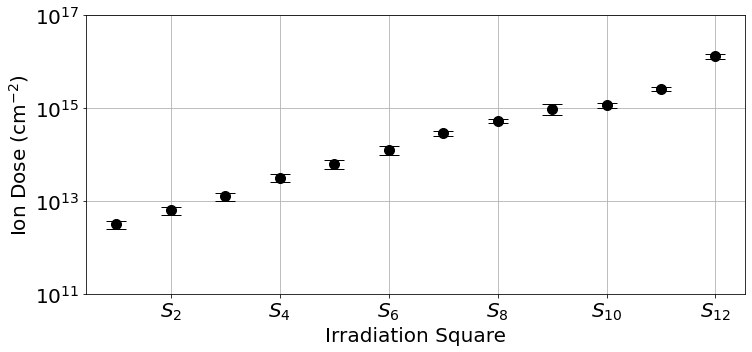

In [10]:
cm = 1/2.54 
plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(30*cm, 13*cm))
plt.grid()
plt.xlabel(r'Irradiation Square')
plt.ylabel(r'Ion Dose (cm$^{-2}$)')
plt.errorbar(x ,dose_value, yerr=dose_error, fmt="o", color="k", markersize=10, capsize=10)
plt.xticks([2,4,6,8,10,12], ('$S_2$','$S_4$','$S_6$','$S_8$','$S_{10}$','$S_{12}$'))
# plt.yticks(('$P_2$','$P_4$','$P_6$','$P_8$','$P_10$','$P_{12}$'))
# plt.yticks([1e11,1e12, 1e13,1e14,1e15,1e16], ('$10^{11}$','$10^{12}$','$10^{13}$','$10^{14}$','$10^{15}$','$10^{16}$'))

plt.ylim(1e11, 1e17)
plt.yscale("log")
fig.savefig('dose_log.eps', format= 'eps',transparent=True, dpi = 300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


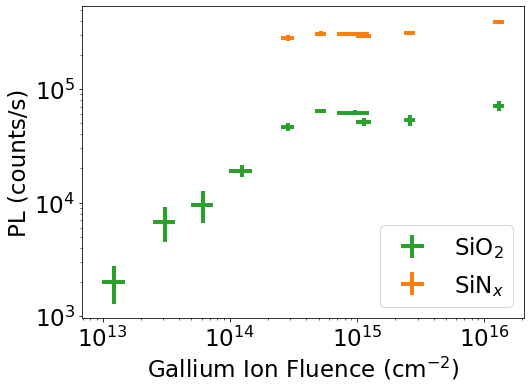

In [11]:
plt.rcParams.update({'font.size': 23})
cm = 1/2.54 
fig = plt.figure(figsize=(20*cm, 15*cm))
# plt.grid()
# plt.axhline(y=0, color='k', linestyle='dashed')
error_kw=dict(lw=10, capsize=0, capthick=10)
plt.errorbar(dose_value[2:12], pl97_value[2:12]/10, xerr=dose_error[2:12], yerr=pl97_error[2:12]/10, fmt="none", color="C2", markersize=10, capsize=0, elinewidth=4,label='SiO$_2$')
plt.errorbar(dose_value[6:12], pl98_value[6:12]/10, xerr=dose_error[6:12], yerr=pl98_error[6:12]/10, fmt="none", color="C1", markersize=10, capsize=0, elinewidth=4,label='SiN$_x$')

plt.xlabel('Gallium Ion Fluence (cm$^{-2})$')
plt.ylabel('PL (counts/s)')
plt.xscale('log')
plt.yscale('log')
# plt.gca().invert_xaxis()
plt.legend(loc='lower right')
plt.tight_layout()
fig.savefig('PL_log_x_ALL.eps', format= 'eps',transparent=True)
fig.savefig('PL_log_x_ALL.png', format= 'png',transparent=True)